In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [29]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [30]:
# Save references to each table
station= Base.classes.station
measurement= Base.classes.measurement

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
#session.query
#if I wanted station and elevation
result = session.query(station.station, station.elevation)\
.filter(station.elevation >= 30)\
.first() #first in the row that matches quert, not a list just a single tuple.
#.all() #select from-table and column-all allows you to see data and work with it-list of tuples #all is return all rows that match 

result
#pd.DataFrame(result)



('USC00518838', 306.6)

In [33]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()

most_recent_date

'2017-08-23'

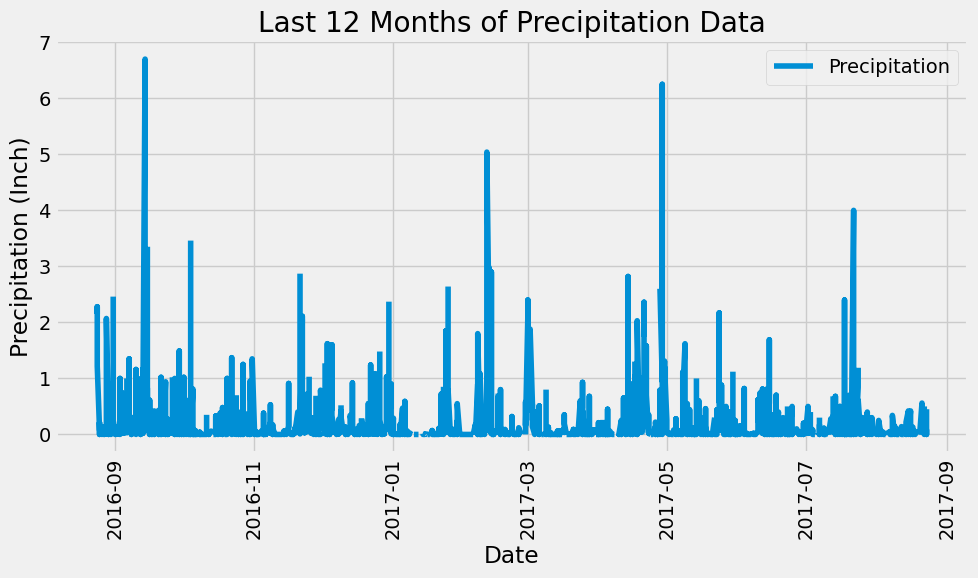

In [34]:
# Starting from the most recent data point in the database. 
latest_date = session.query(func.max(measurement.date)).scalar()

# Calculate the date one year from the last date in data set.
latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d')
year_ago = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp)\
    .filter(measurement.date >= year_ago).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values("Date")



#convertfrom string aka object to date/time
precipitation_df["Date"]= pd.to_datetime(precipitation_df["Date"]) 



# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,6))
plt.plot(precipitation_df['Date'], precipitation_df['Precipitation'],label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (Inch)')
plt.title('Last 12 Months of Precipitation Data')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()








In [35]:
precipitation_df.dtypes

Date             datetime64[ns]
Precipitation           float64
dtype: object

In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data

precipitation_df[["Precipitation"]].describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).scalar()
total_stations


9

In [38]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station)\
    .order_by(func.count(measurement.station).desc())\
    .all()


for station_name, count in active_stations:
    print(f"{station_name},{count}")

USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [39]:
# Retrieve the most active station ID from the previous query result
most_active_station = active_stations[0][0]

# Query to calculate lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))\
    .filter(measurement.station == most_active_station)\
    .all()

# Extract the results
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

print(f"station {most_active_station}:")
print(f"Lowest Temperature: {lowest_temp} ")
print(f"Highest Temperature: {highest_temp} ")
print(f"Average Temperature: {avg_temp} ")

station USC00519281:
Lowest Temperature: 54.0 
Highest Temperature: 85.0 
Average Temperature: 71.66378066378067 


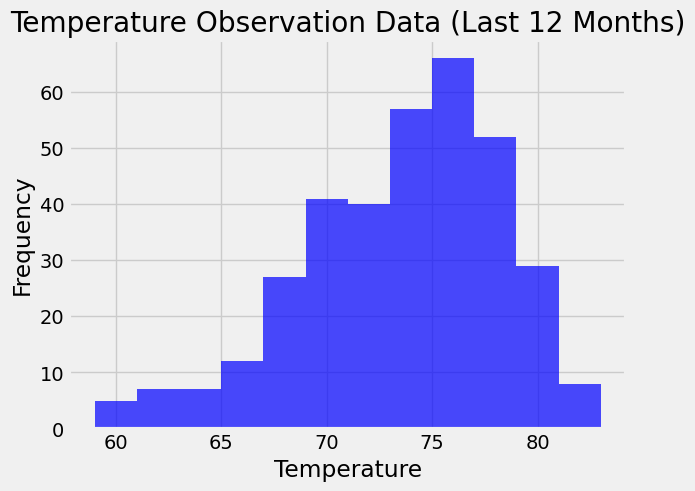

In [40]:
# Using the most active station id Query the last 12 months of temperature observation data for this station and 
temperature_data = session.query(measurement.tobs)\
    .filter(measurement.station == most_active_station)\
    .filter(measurement.date >= year_ago)\
    .all()


temperatures = [temp[0] for temp in temperature_data]

#plot the results as a histogram
plt.hist(temperatures, bins=12, alpha=0.7, color='blue')
plt.title('Temperature Observation Data (Last 12 Months)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [41]:
# Close Session
session.close()

In [42]:
#turn prec_df into dictionary 

precipitation_df.set_index("Date")["Precipitation"].to_dict()

{Timestamp('2016-08-24 00:00:00'): 1.22,
 Timestamp('2016-08-25 00:00:00'): 0.08,
 Timestamp('2016-08-26 00:00:00'): 0.0,
 Timestamp('2016-08-27 00:00:00'): 0.02,
 Timestamp('2016-08-28 00:00:00'): 2.07,
 Timestamp('2016-08-29 00:00:00'): 0.9,
 Timestamp('2016-08-30 00:00:00'): 0.02,
 Timestamp('2016-08-31 00:00:00'): 0.25,
 Timestamp('2016-09-01 00:00:00'): 0.0,
 Timestamp('2016-09-02 00:00:00'): 0.19,
 Timestamp('2016-09-03 00:00:00'): 0.12,
 Timestamp('2016-09-04 00:00:00'): 0.03,
 Timestamp('2016-09-05 00:00:00'): nan,
 Timestamp('2016-09-06 00:00:00'): 0.03,
 Timestamp('2016-09-07 00:00:00'): 0.05,
 Timestamp('2016-09-08 00:00:00'): 0.01,
 Timestamp('2016-09-09 00:00:00'): 0.23,
 Timestamp('2016-09-10 00:00:00'): 0.0,
 Timestamp('2016-09-11 00:00:00'): 0.05,
 Timestamp('2016-09-12 00:00:00'): 0.04,
 Timestamp('2016-09-13 00:00:00'): 0.34,
 Timestamp('2016-09-14 00:00:00'): nan,
 Timestamp('2016-09-15 00:00:00'): 0.42,
 Timestamp('2016-09-16 00:00:00'): 0.01,
 Timestamp('2016-09-17

In [43]:
#turn station int list

all_stations = session.query(station.station).all()
all_stations

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]